In [86]:
####### All required imports ########
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display
import matplotlib
import os
###################################
### We are supressing all warnings with an assurance that the 
#  warnings that are supressed are are not substantial #
#########################################
import warnings
warnings.filterwarnings('ignore')
###################################

In [87]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_format = 'retina'
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 16,
#     'font.family':'monospace', 'font.monospace': 'Courier New',
    'legend.fontsize': 15.0, 'figure.figsize': [15, 8]}
plt.rcParams.update(**rc)
sns.set(style='white', rc=rc)

In [88]:
###### Resolve the path of the data source #######
ROOT = r'../res/baseball'
# -----  team data ----- #
_salary = os.path.join(ROOT, 'Salaries.csv')
_master = os.path.join(ROOT, 'Master.csv')
_teams = os.path.join(ROOT, 'Teams.csv')

In [89]:
##### Read the data files #######
data_1 = pd.read_csv(_salary)
master = pd.read_csv(_master)
####### Creating data_1 and pulling the fileds form csvs that we need only #######
required_master_cols = ['playerID', 'nameFirst', 'nameLast', 
                        'weight', 'height', 'bats', 'throws']
data_1 = data_1.merge(master[required_master_cols], on='playerID', how='inner')
data_1['fullName'] = data_1['nameFirst'] + '_' + data_1['nameLast']

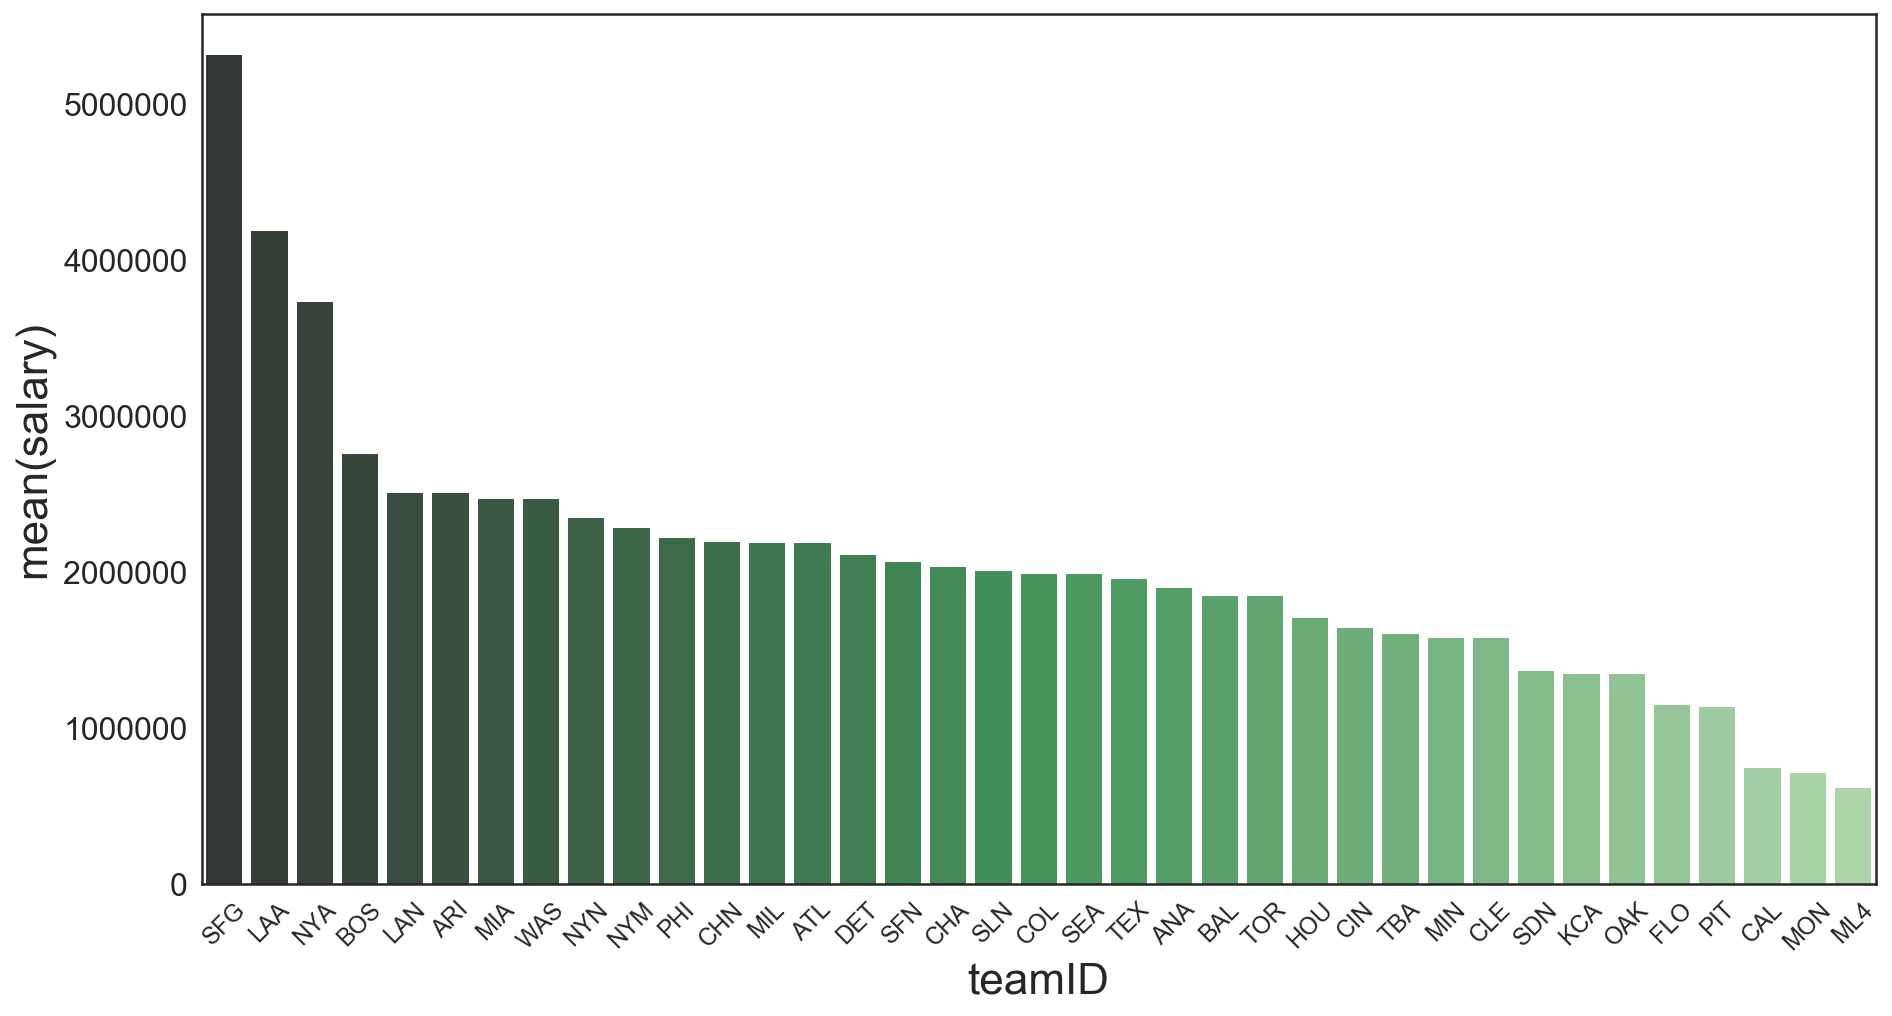

In [90]:
###### First we want to see how teams invested in their player #########

##### Clean and extract the fields we require #########
plt_data = data_1.groupby('teamID', as_index=False)['salary'].mean()
plt_data.sort_values(['salary'], ascending=False, inplace=True)
plt_data = plt_data.reset_index().drop('index', axis=1)
# display(plt_data)
########################################################
#~~~~~~~~~~~~~~~  NOW PLOT THE DATA ~~~~~~~~~~~~~~~~~~#
ax = sns.barplot(x="teamID", y="salary", data=plt_data, palette="Greens_d")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Now we know that `SFG, LAA, NYA, BOS, LAN` are the top 5 teams in terms of spending money on their players. The next thing that we should do is to check what are top **players** in terms of salary and logically they should be from **these top teams**.

In [91]:
plot_data = data_1.groupby(['fullName'], as_index=False)['salary'].mean()
plot_data.sort_values(['salary'], inplace=True, ascending=False)
ten_most_expensive_players = plot_data.fullName.head(n=10)

###########  this part is important for later use   ##########
# It stores the top 10 players and their teams they played #
their_clubs = []
g=data_1[data_1.fullName.isin(ten_most_expensive_players)].groupby(['fullName', 'teamID'])
for k, gr in g:
    their_clubs.append(k)
##############################################################

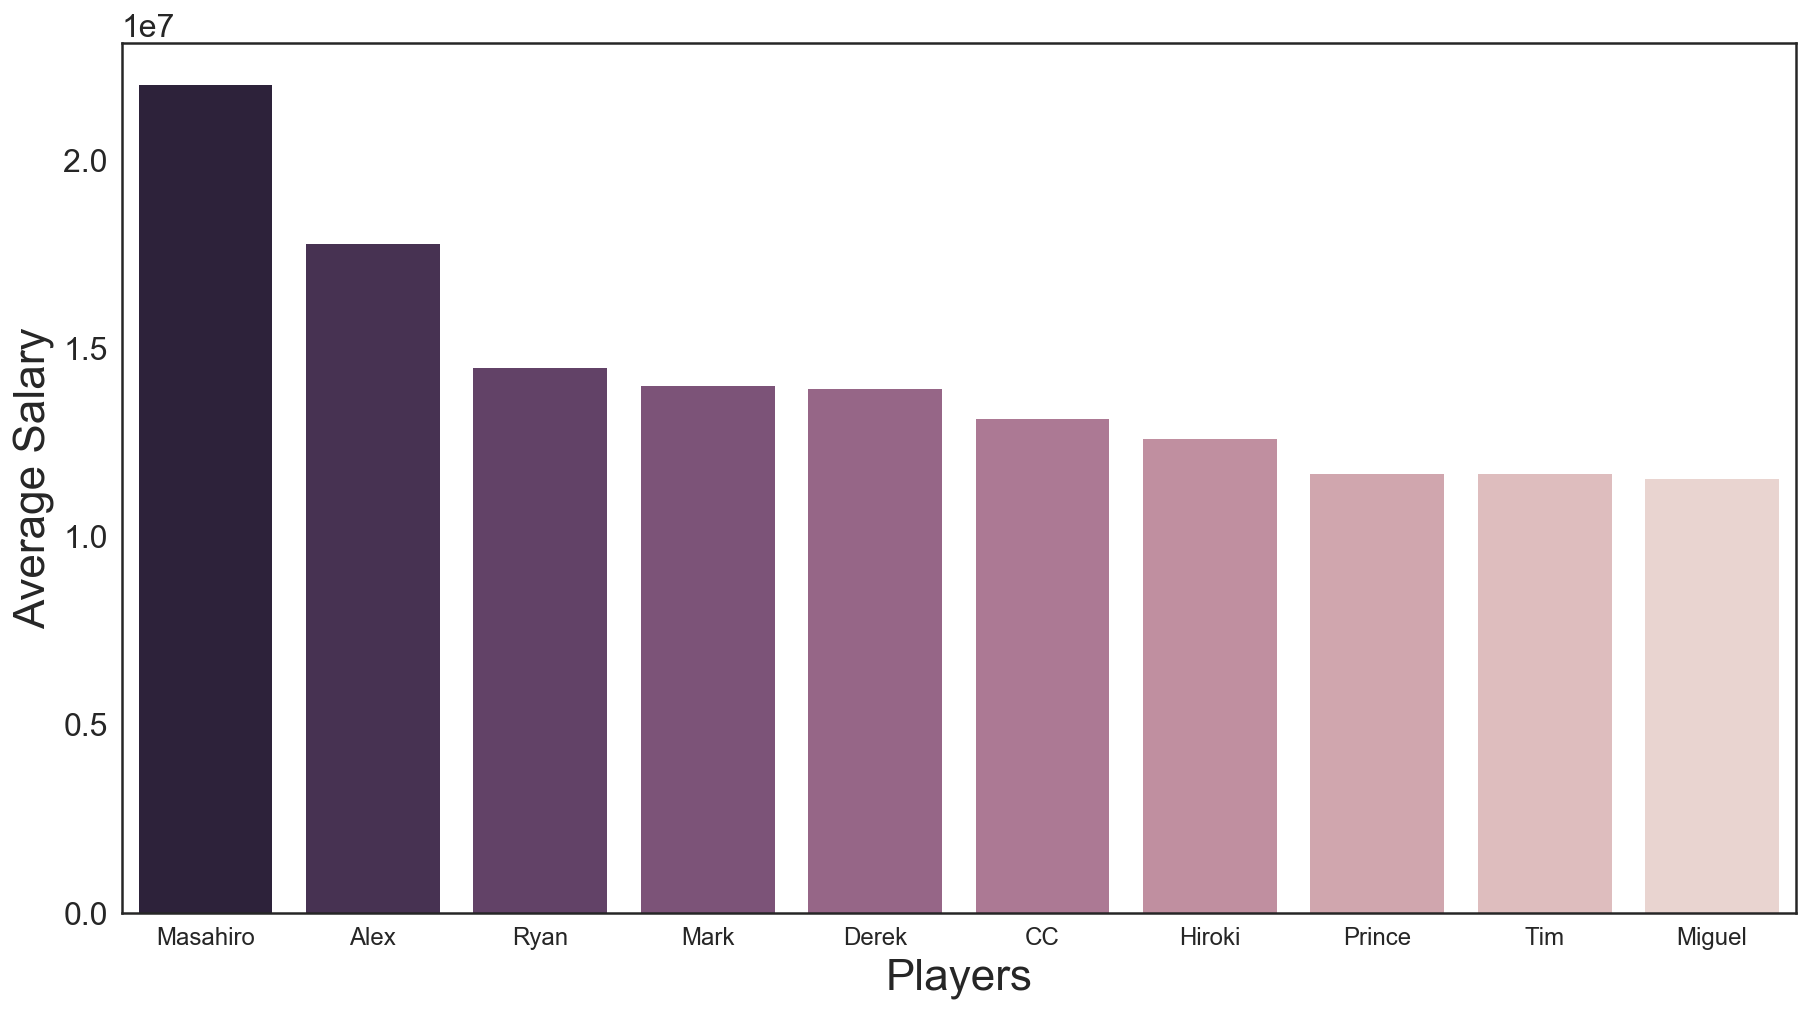

In [92]:
plot_data = plot_data[plot_data.fullName.isin(ten_most_expensive_players)] # getting only the top 10 players
plot_data = plot_data.reset_index().drop('index', axis=1)  # fixing the structure for seaborn plot
# Plotting the top 10 players #
ax = sns.barplot(x="fullName", y="salary", data=plot_data, palette=sns.cubehelix_palette(10, reverse=True))
ax.set(xticklabels=[*map(lambda e: e.split('_')[0], plot_data.fullName)])  # printing only the firstName
ax.set(xlabel='Players', ylabel='Average Salary')
plt.show()
##############################

Now before we move ahead, let's visualize the distruibution desdity of player's salary. From this we can visualize that what is the most common salary ranges teams prefer to compensate their players.

In [93]:
their_clubs
# data_1

[('Alex_Rodriguez', 'NYA'),
 ('Alex_Rodriguez', 'SEA'),
 ('Alex_Rodriguez', 'TEX'),
 ('CC_Sabathia', 'CLE'),
 ('CC_Sabathia', 'NYA'),
 ('Derek_Jeter', 'NYA'),
 ('Hiroki_Kuroda', 'LAN'),
 ('Hiroki_Kuroda', 'NYA'),
 ('Mark_Teixeira', 'ATL'),
 ('Mark_Teixeira', 'NYA'),
 ('Mark_Teixeira', 'TEX'),
 ('Masahiro_Tanaka', 'NYA'),
 ('Miguel_Cabrera', 'DET'),
 ('Miguel_Cabrera', 'FLO'),
 ('Prince_Fielder', 'DET'),
 ('Prince_Fielder', 'MIL'),
 ('Prince_Fielder', 'TEX'),
 ('Ryan_Howard', 'PHI'),
 ('Tim_Lincecum', 'SFG'),
 ('Tim_Lincecum', 'SFN')]

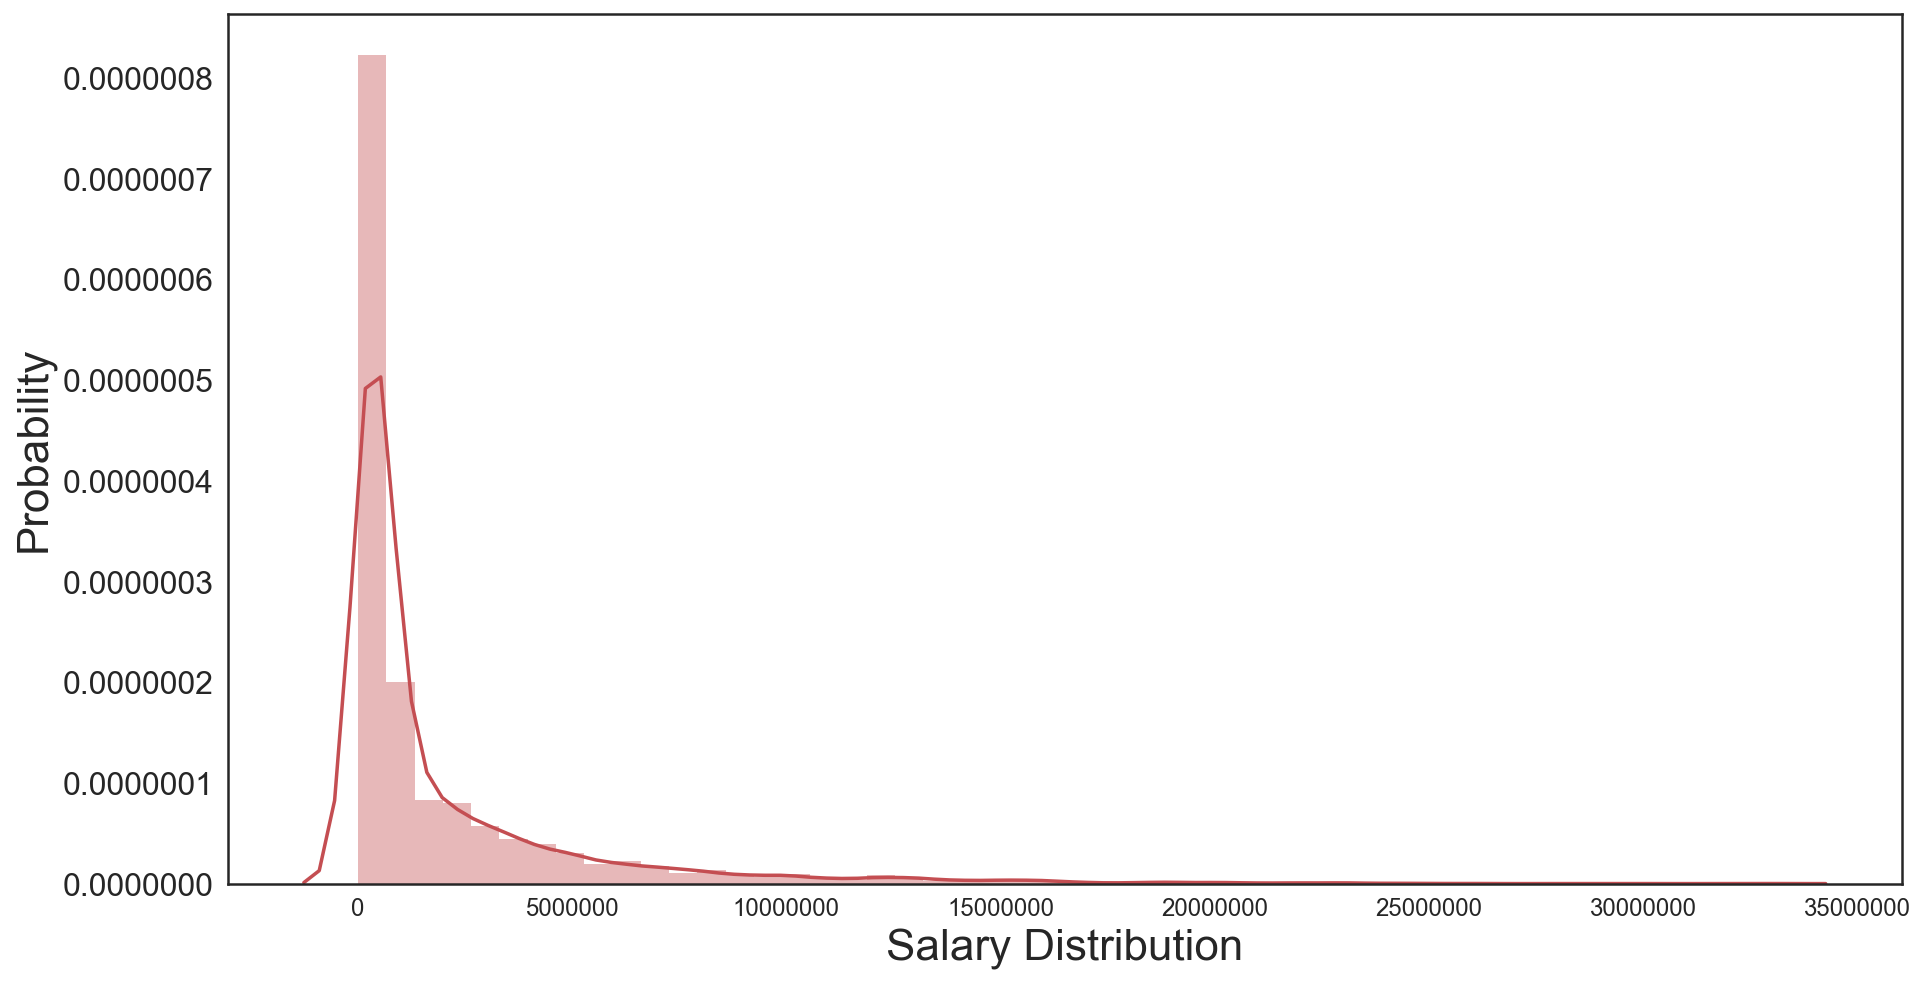

In [94]:
from scipy import stats, integrate
ax = sns.distplot(data_1.salary, bins=50, kde=True, rug=False, color='r');
# sns.kdeplot(data_1.salary, shade=True);
# ax.get_xaxis().get_major_formatter().set_useOffset(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
ax.set(xlabel='Salary Distribution', ylabel='Probability')
# TODO  Manually format the xticklabels and yticklabels values
plt.show()

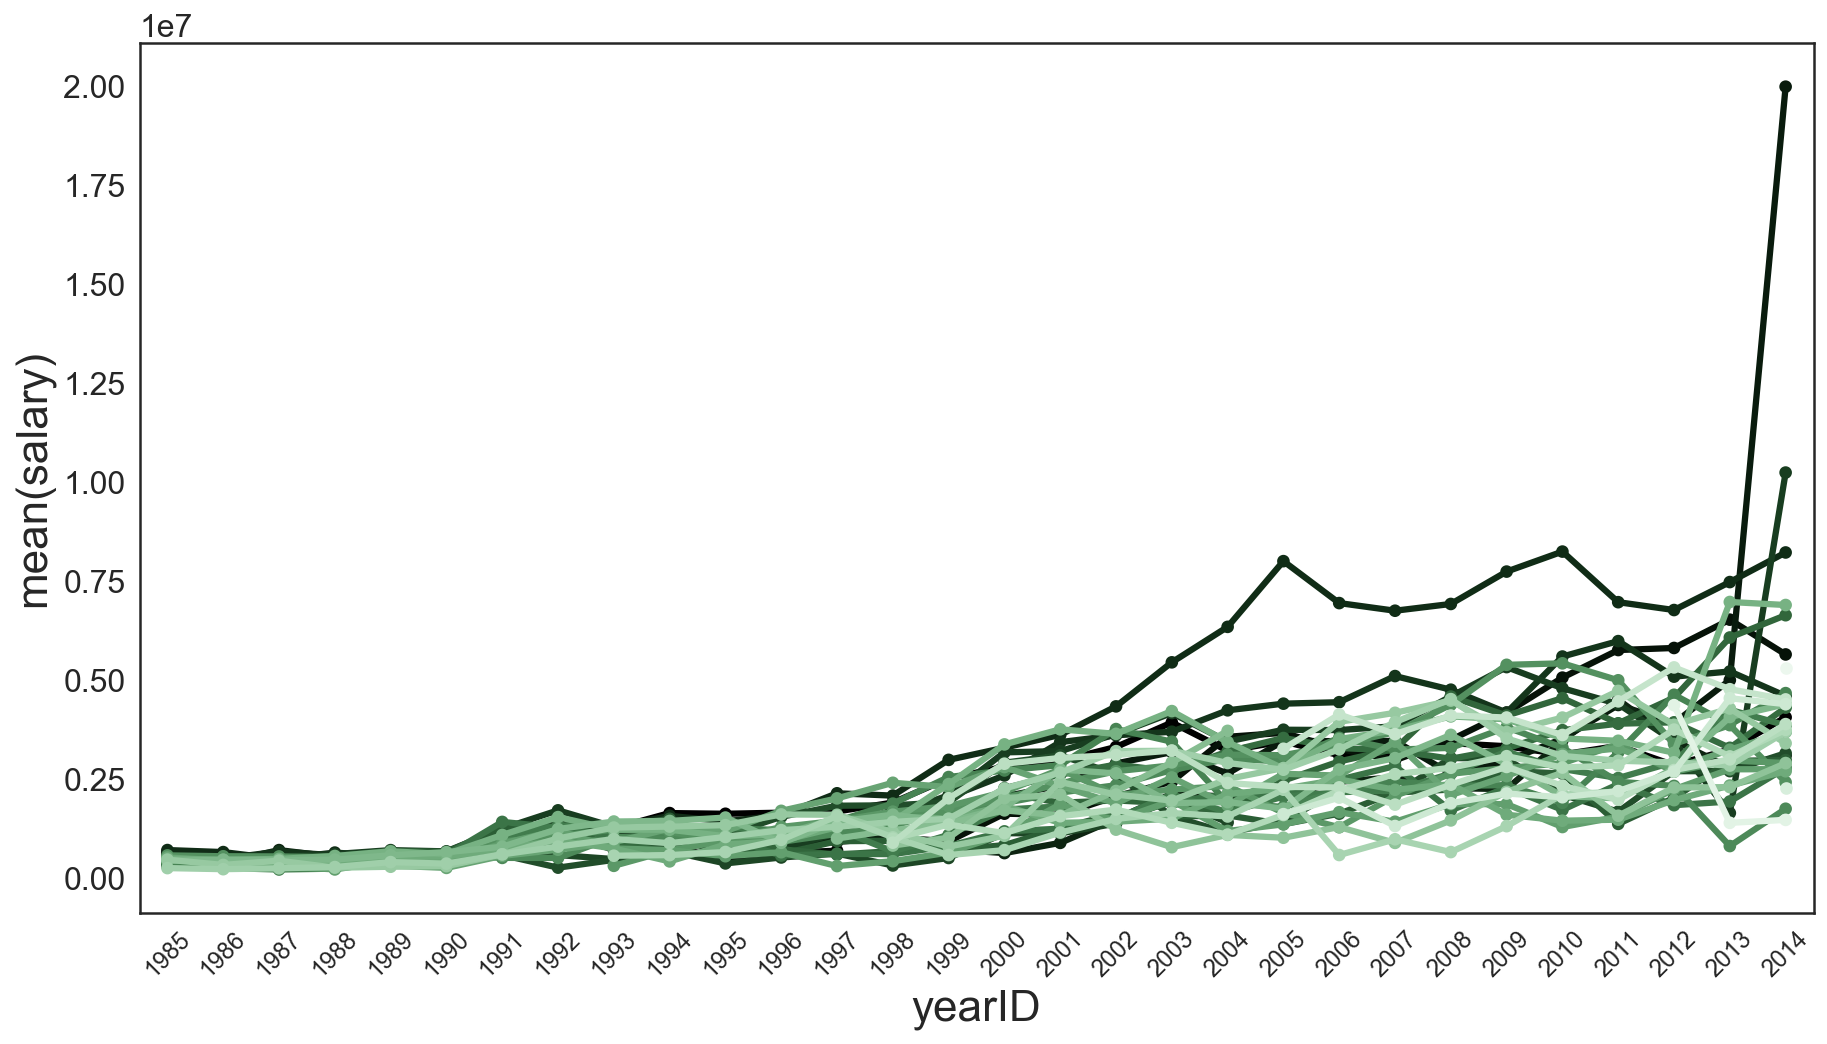

In [95]:
rot = sns.cubehelix_palette(len(data_1.teamID.unique()), start=2, rot=0, dark=0, light=.95, reverse=True)
ax = sns.pointplot(x="yearID", y="salary", data=data_1, hue='teamID', palette=rot, ci=None, markers='.')
ax.legend_.remove()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()
# g.salary.mean()
#     print(k, grp.salary.mean())

In [96]:
batting = pd.read_csv(os.path.join(ROOT, 'Batting.csv'))
batting = batting[batting.yearID >= 1985].fillna(0).reset_index().drop('index', axis=1)

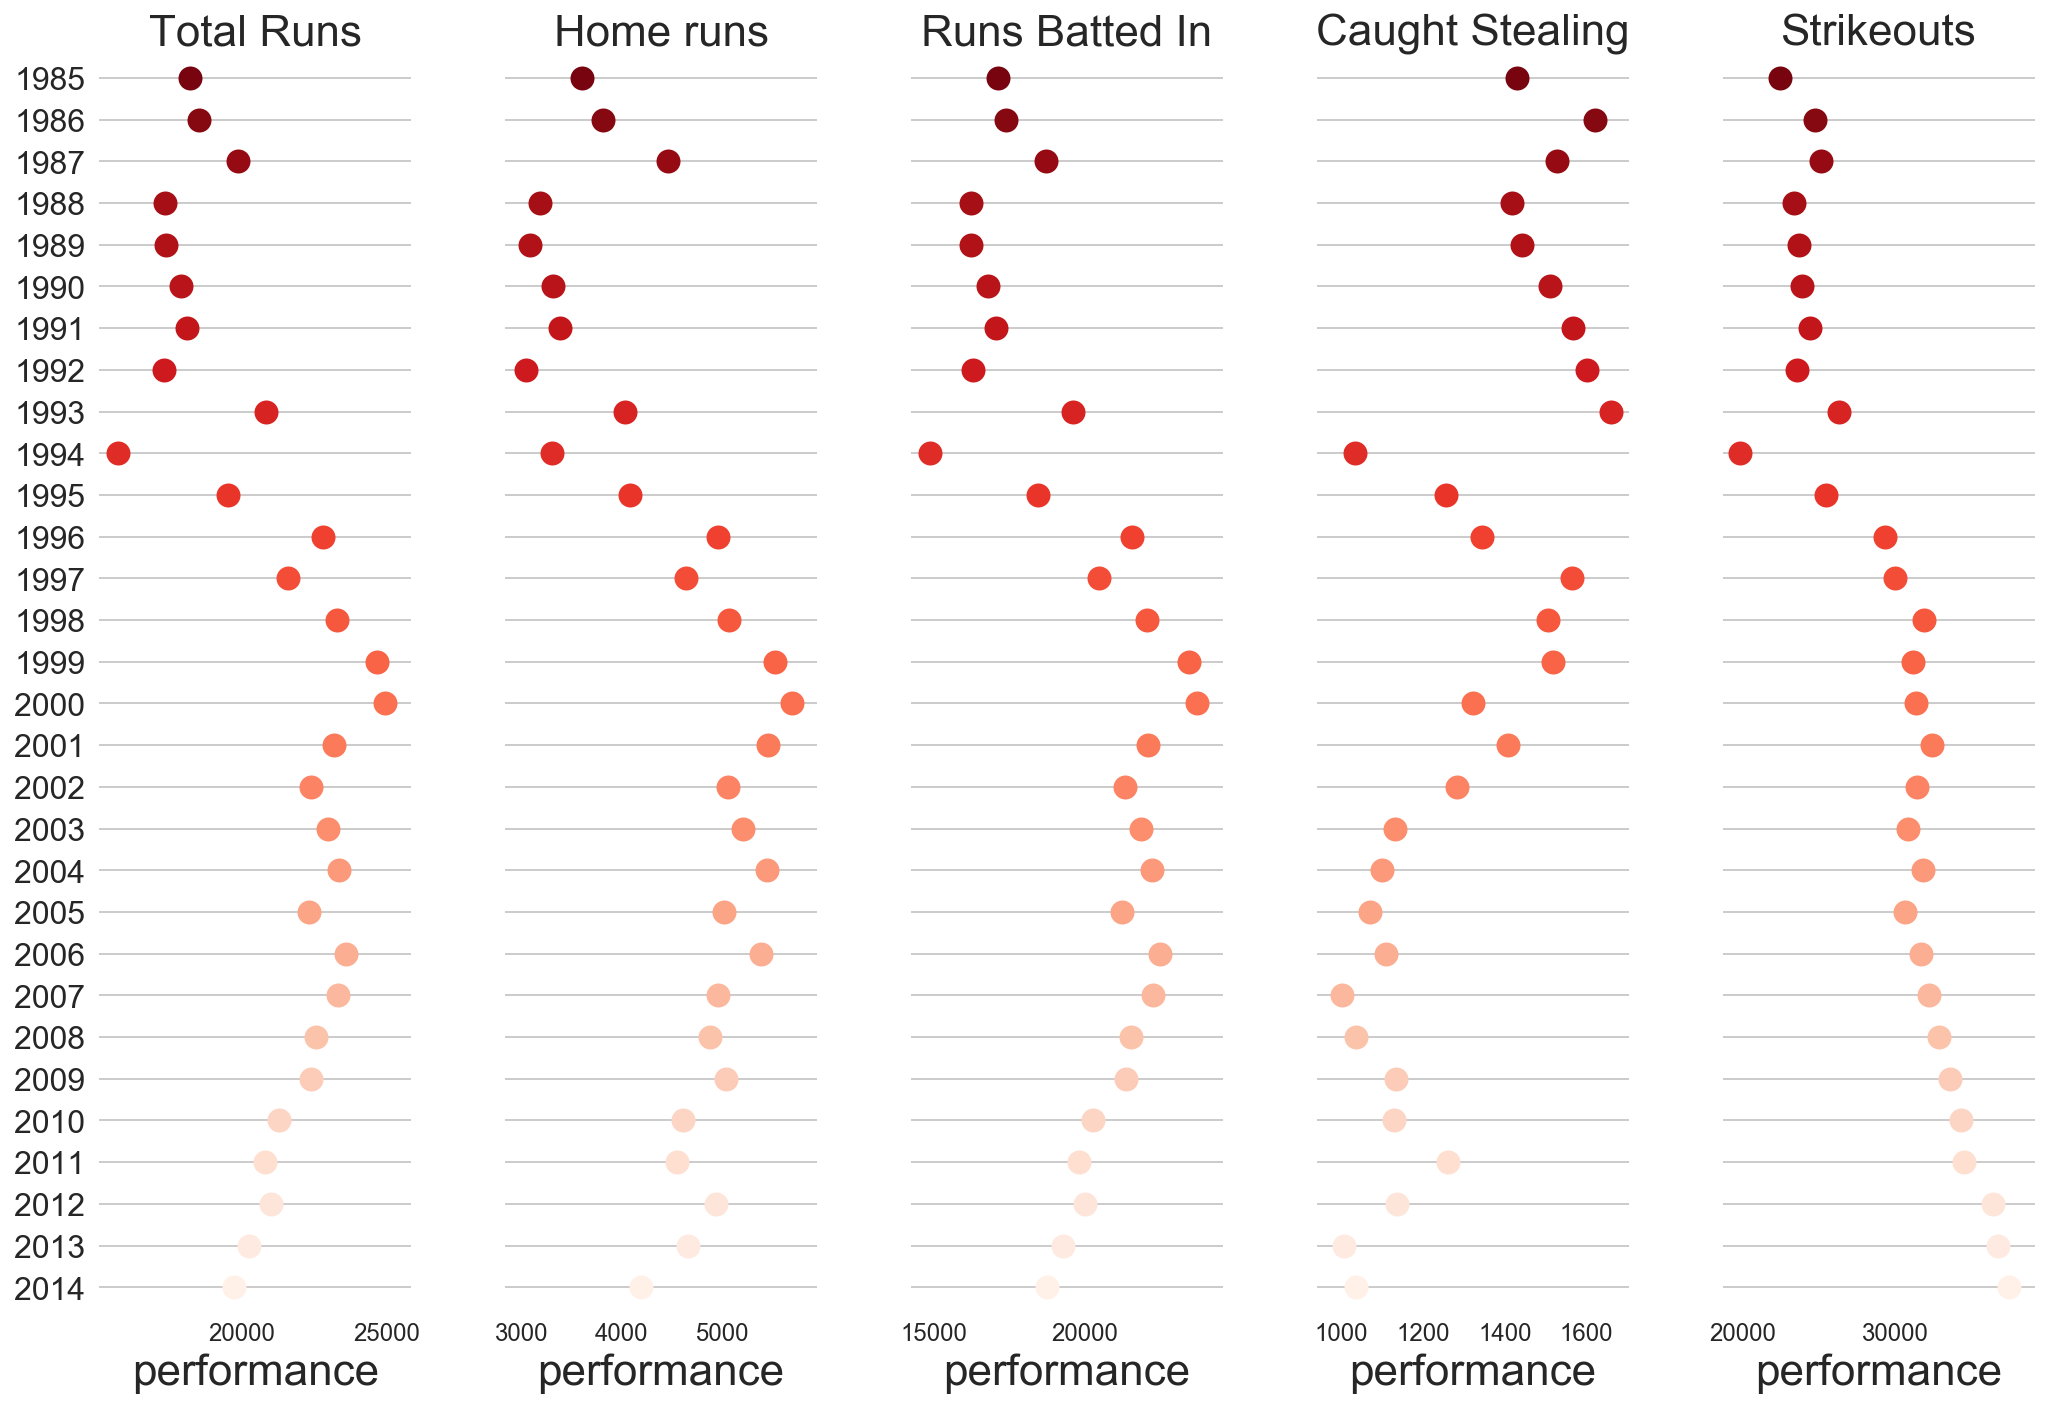

In [97]:
plot_data = batting.groupby('yearID', as_index=False).sum()

g = sns.PairGrid(plot_data, 
                 x_vars=['R', 'HR', 'RBI', 'CS', 'SO'], y_vars=["yearID"], 
                 size=10, aspect=.3)

# # # Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=12, orient="h",
      palette="Reds_r", edgecolor="red")

# # # Use the same x axis limits on all columns and add better labels
g.set(xlabel="performance", ylabel="")

# # # Use semantically meaningful titles for the columns
titles = ["Total Runs", "Home runs", "Runs Batted In", "Caught Stealing", "Strikeouts"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

# #     # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.show()

Now in the above plot I have tried to show how different metric changed over time form 1985 to 2014. We can see for example that there is an abrupt decrese in the total runs scored in the year of 1994 as compared to other years. **Let's verify if the plot shows the right value?** If we execute `plot_data.R.argmin()` it returns `9` which is the row number of the `plot_data` table which is further derived from `batting`. So to get the year we execute `plot_data.ix[9][['yearID', 'R']]` and indeed the year is 1994 and the run is 15752 which can also be verified from the scale. Evidently all other performance of Batters and Pitchers in the year of 1994 was poor as compared to other years. ** SO I GUESS 1994 WAS A DARK YEAR FOR BASEBALL FANS..:)**

### Time for another data cleaning

Now as we have colleced some data into the DataFrame called `data_1`, we need to match it with our new DataFrame: `batting`. In other words we need to keep only those entries from `batting` Dataframe whose entry is found in the `data_1` DataFrame. The resaon we want to do this because we don't want to keep any entries of any players who salary, name, surname, height, weight, pitching hand and batting hand is not present. The common way to achieve this is to <font color='red'>merge(..)</font> on both the DataFrames `on=playerID`

In [98]:
required_batting_cols = ['playerID', 'G', 'R', 'HR', 'CS', 'SO', 
                         'yearID', 'teamID']
data_1 = data_1.merge(batting[required_batting_cols], 
                 on=['playerID', 'yearID', 'teamID'], 
                 how='left').fillna(0)
# display(data_1)


Now I would go into much more interesting and fun stuffs we I would bring in some statistics and hypothesis tests into this but for now, let's focus on the the data table that we have already. Here all the batters staticstics form 1985 to 2014 is avaialbale with their salary and other game related performances.

Let's merge the **pitching** table too as we have done with the **batting** table. The data cleaning process would be exactly similar except the coulumns that needs to be merged

In [174]:
pitching = pd.read_csv(os.path.join(ROOT, 'Pitching.csv'))
pitching = pitching[pitching.yearID >= 1985]

required_pitching_cols = ['yearID', 'teamID', 'playerID',
                          'G','SHO', 'SV', 'HR', 'R']
k = pd.merge(data_1, pitching[required_pitching_cols], 
            on=['playerID', 'yearID', 'teamID', 'G'],
            how='left').fillna(0)
k.rename(columns={"R_x": "Runs_Scored", 
                  "R_y": "Runs_Allowed",
                  "HR_x": "HR_Scored",
                  "HR_y": "HR_Allowed"}, inplace=True)
# display(k)

In [15]:
plot_data = data_1.groupby('playerID')
d = {'player': [], 'height': [], 'runs_scored': [], 'batting_hand': []}
formatter = {'R': 'Right', 'L': 'Left', 'B': 'Both'}
for k, grp in plot_data:
    d['player'].append(k)
    d['height'].append(grp.height.mean())
    d['runs_scored'].append(grp.R.sum())
    d['batting_hand'].append(formatter[grp.bats.unique()[0]])
plot_data = pd.DataFrame(d)

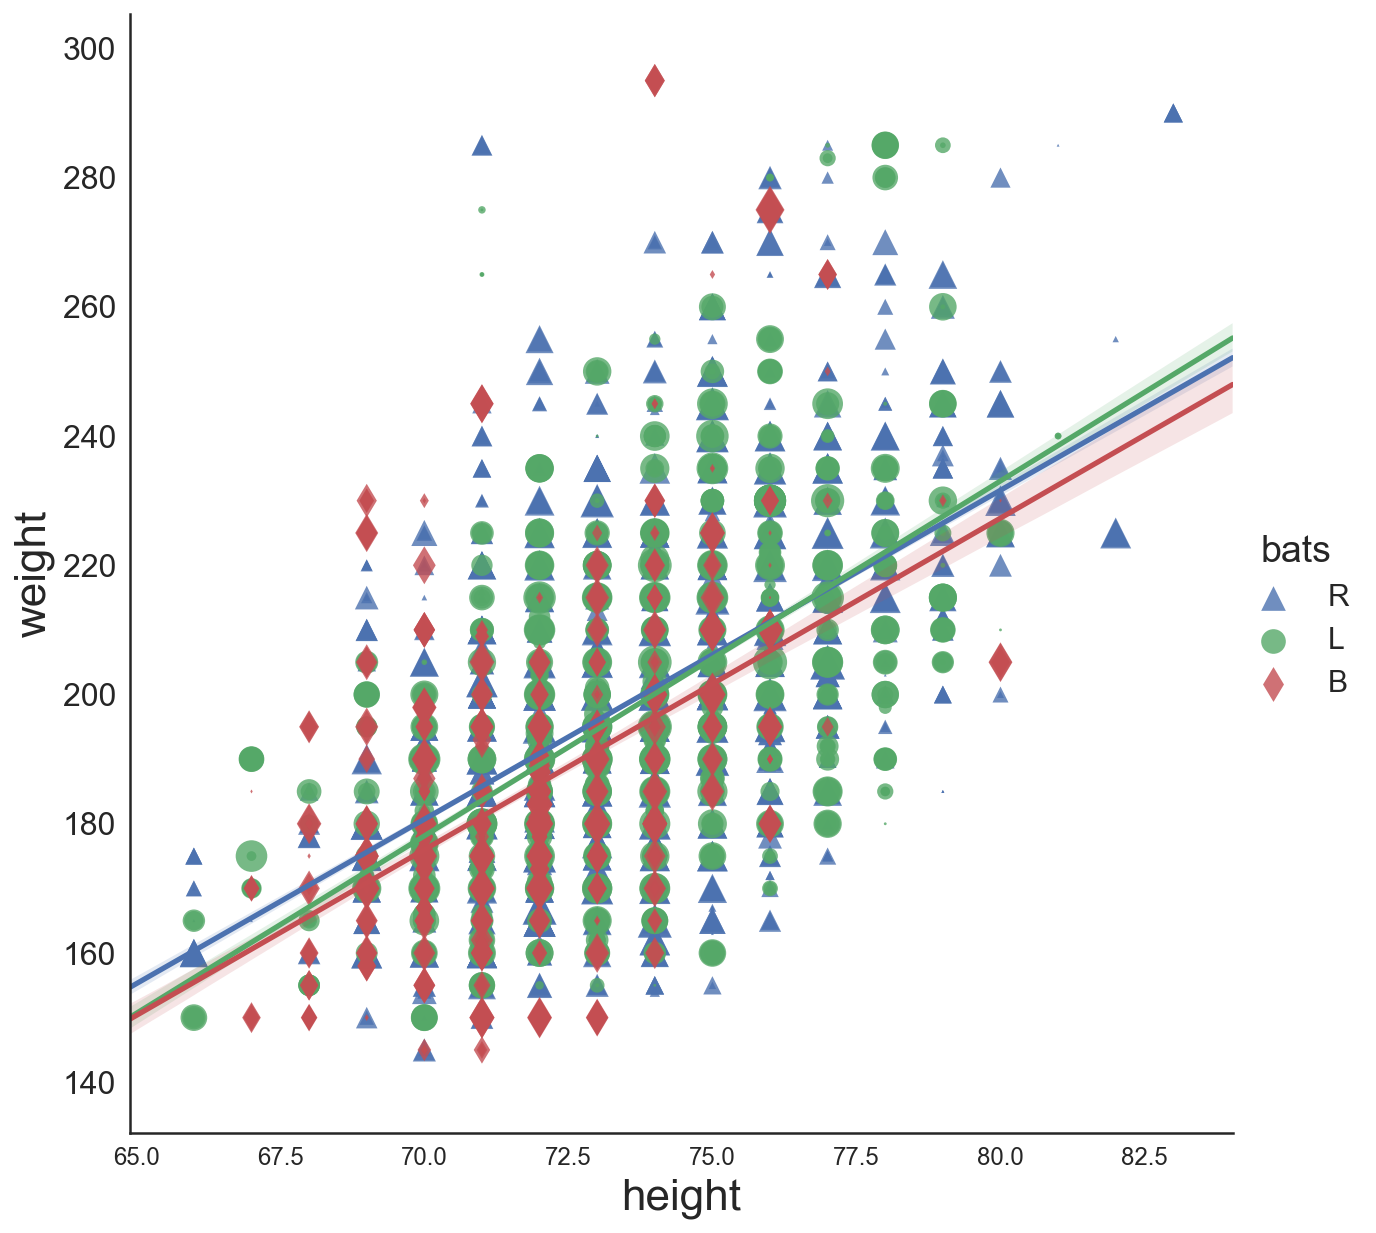

In [29]:
sns.lmplot(data=data_1, x="height", y="weight", size=9, aspect=1, hue="bats",
          scatter_kws=dict(s=data_1.R * 2), markers=['^', 'o', 'd'])
plt.show()

## What are the facts the above plot shows ??

- More players play with their **LEFT** hand as compared to the **RIGHT** hand because there is a lot green as compared to red and blue
- Players with most runs are of **medium height and medium weight** category. Tall or heavy weight players performed not so well.

**Let's see if trend is same in case of of Pitchers!!**

In [85]:
# sns.lmplot(data=data_1, x="height", y="weight", size=9, aspect=1, hue="bats",
#           scatter_kws=dict(s=data_1.SHO), markers=['^', 'o', 'd'])
# plt.show()
display(data_1[data_1.playerID == 'bannifl01'][['yearID', 'SHO']])
display(pitching[pitching.playerID == 'bannifl01'][['yearID', 'SHO']])
pitching.columns

,yearID,SHO
521,1985,0.000
522,1986,0.000
523,1987,0.000
524,1988,0.000
525,1989,0.000
526,1991,0.000
527,1992,0.000


,yearID,SHO
24995,1985,1
25445,1986,1
25896,1987,2
26362,1988,0
26829,1989,0
27836,1991,0
28335,1992,0


Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [100]:
display(data_1)

,yearID,teamID,lgID,playerID,salary,nameFirst,nameLast,weight,height,bats,throws,fullName,G,R,HR,CS,SO
0,1985,ATL,NL,barkele01,870000,Len,Barker,225.000,77.000,R,R,Len_Barker,20.000,0.000,0.000,1.000,7.000
1,1986,ATL,NL,barkele01,880000,Len,Barker,225.000,77.000,R,R,Len_Barker,0.000,0.000,0.000,0.000,0.000
2,1987,ATL,NL,barkele01,890000,Len,Barker,225.000,77.000,R,R,Len_Barker,0.000,0.000,0.000,0.000,0.000
3,1987,ML4,AL,barkele01,72500,Len,Barker,225.000,77.000,R,R,Len_Barker,11.000,0.000,0.000,0.000,0.000
4,1988,ATL,NL,barkele01,900000,Len,Barker,225.000,77.000,R,R,Len_Barker,0.000,0.000,0.000,0.000,0.000
5,1985,ATL,NL,bedrost01,550000,Steve,Bedrosian,200.000,75.000,R,R,Steve_Bedrosian,37.000,3.000,0.000,0.000,22.000
6,1986,PHI,NL,bedrost01,650000,Steve,Bedrosian,200.000,75.000,R,R,Steve_Bedrosian,68.000,0.000,0.000,0.000,1.000
7,1987,PHI,NL,bedrost01,1050000,Steve,Bedrosian,200.000,75.000,R,R,Steve_Bedrosian,65.000,0.000,0.000,0.000,3.000
8,1988,PHI,NL,bedrost01,925000,Steve,Bedrosian,200.000,75.000,R,R,Steve_Bedrosian,57.000,0.000,0.000,0.000,2.000
9,1989,PHI,NL,bedrost01,1450000,Steve,Bedrosian,200.000,75.000,R,R,Steve_Bedrosian,28.000,0.000,0.000,0.000,0.000
